# Advanced Regression

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
    Which variables are significant in predicting the price of a house, and
    How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



### Following steps will be followed for building Advance Regression Model

* Data Sourcing
* Data Cleaning
* Data Preparation
* Data Exploration
* Data Modeling
* Dertmine Lamda / Alpha
* Conclusion ad Recomendation

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

### Data Sourcing

In [2]:
house_data = pd.read_csv('train.csv')
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Analyse the size of the provided dataset, total number of columns and rows
house_data.shape

(1460, 81)

In [4]:
# Dropping duplicate values in dataset, if exist
house_data = house_data.drop_duplicates()
house_data.shape

(1460, 81)

In [5]:
# There are 81 columns i.e attribtes provided for this data set to anaylize, we can check what all columns are having Null values 
house_data.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [6]:
# From the above PoolQC, MiscFeature, Alley, Fence and FireplaceQu columns are having most of null values, 
# so we can drop all columns having null values
house_data.drop(['Id'],axis=1,inplace=True)
house_data.drop(['PoolQC'],axis=1,inplace=True)
house_data.drop(['MiscFeature'],axis=1,inplace=True)
house_data.drop(['Alley'],axis=1,inplace=True)
house_data.drop(['Fence'],axis=1,inplace=True)
house_data.drop(['FireplaceQu'],axis=1,inplace=True)
house_data.drop(['LotFrontage'],axis=1,inplace=True)

In [7]:
house_data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2008        WD        Normal    208500  
1        0        0       5    2007        WD        Normal    181500  
2        0        0       9    2008        WD        Normal    223500  
3        0        0       2    2006        WD       Abnorml    140000  
4        0        0      12    2008        WD        Normal    250000  

[5 rows x 74 columns]

In [8]:
# Check Value Counts of each column
house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [9]:
# value counts of all the columns

for column in house_data:
    print('*****************************************************************')
    print(house_data[column].astype('category').value_counts())


*****************************************************************
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
*****************************************************************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
*****************************************************************
7200      25
9600      24
6000      17
9000      14
10800     14
          ..
8930       1
8935       1
8944       1
8960       1
215245     1
Name: LotArea, Length: 1073, dtype: int64
*****************************************************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
*****************************************************************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
******************************************************

In [10]:
house_data.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.685262   443.639726    46.549315   567.240411  ...   
std       20.645407   181.066207   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   166.000000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

### Data Cleaning
#### Treating Null Values

In [11]:
#Following are the columns having null vlaues
house_data.isnull().sum()[house_data.isnull().sum()>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [12]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
house_data.dropna(axis='rows', inplace=True)

In [13]:
# Now there is no null vlaues
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [14]:
# There are four columns which gives us details about the years of the construction. Deriving a new column house_age of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built
#calculate the age of house
house_data['HouseAge'] = house_data.YrSold - house_data.YearRemodAdd

In [15]:
# above two columns can be drop now
house_data.drop(['YrSold','YearBuilt','MoSold','YearRemodAdd'],axis=1,inplace=True)


In [16]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotArea        1338 non-null   int64  
 3   Street         1338 non-null   object 
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  Condition2     1338 non-null   object 
 12  BldgType       1338 non-null   object 
 13  HouseStyle     1338 non-null   object 
 14  OverallQual    1338 non-null   int64  
 15  OverallCond    1338 non-null   int64  
 16  RoofStyle      1338 non-null   object 
 17  RoofMatl       1338 non-null   object 
 18  Exterior

## Data Preparation

In [17]:
#  Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary
# Dependent COLUMN:
SalePrice = house_data['SalePrice']

# Independent NUMERICAL COLUMNS: 
house_num_col = house_data.dtypes[house_data.dtypes != "object"].index
print(len(house_num_col))

# Independent CATEGORICAL COLUMNS: 
house_cat_col = house_data.dtypes[house_data.dtypes == "object"].index
print(len(house_cat_col))

33
38


In [18]:
print(house_num_col)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'HouseAge'],
      dtype='object')


In [19]:
print(house_cat_col)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


## Data Exploration


In [20]:
# Function for Analysis of Numerical column
def numeric_col_plot(i, col_i):
    plt.figure(i)
    sns.scatterplot(x=col_i, y=SalePrice, data=house_data[[col_i]])

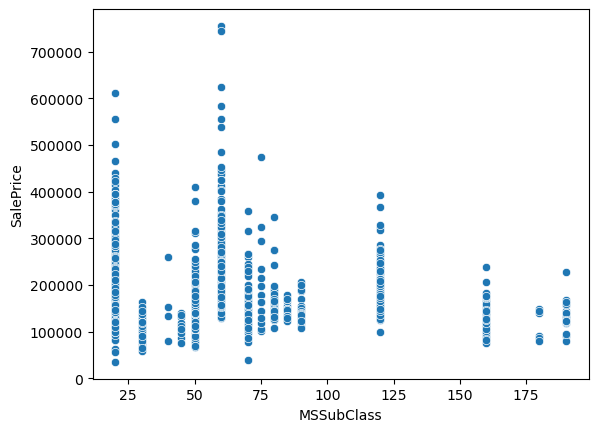

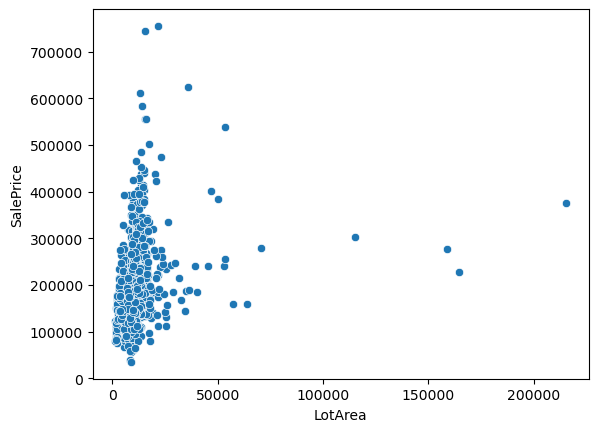

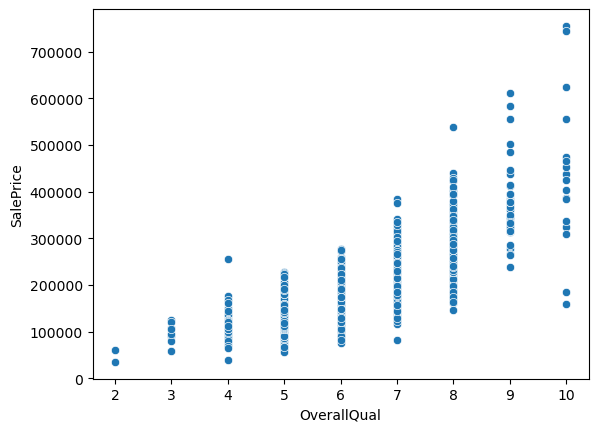

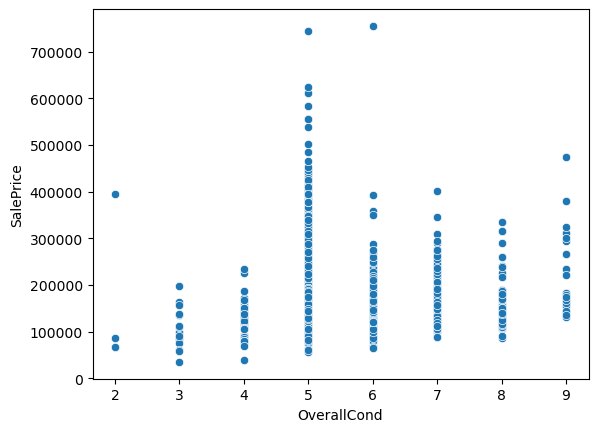

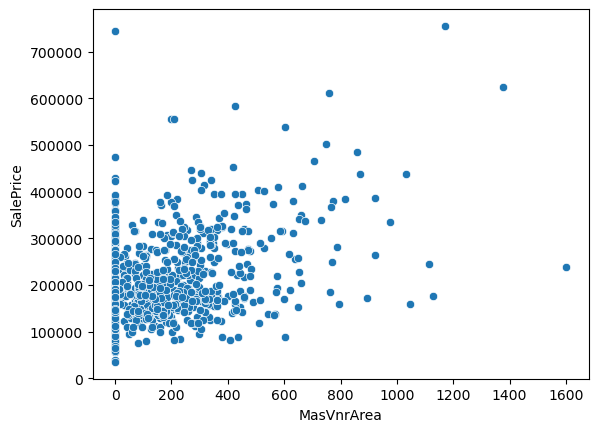

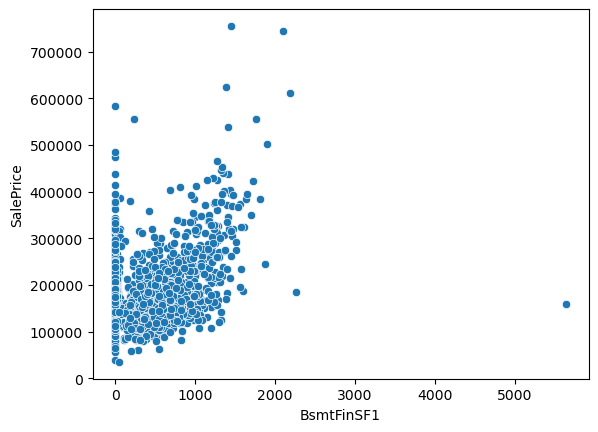

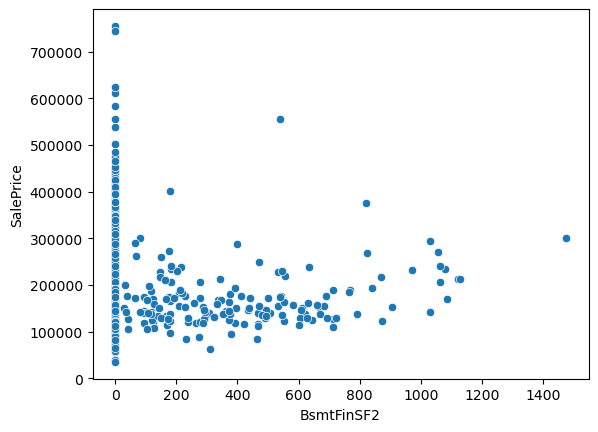

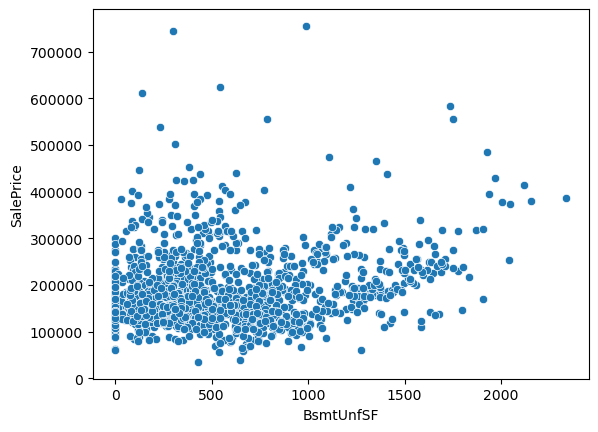

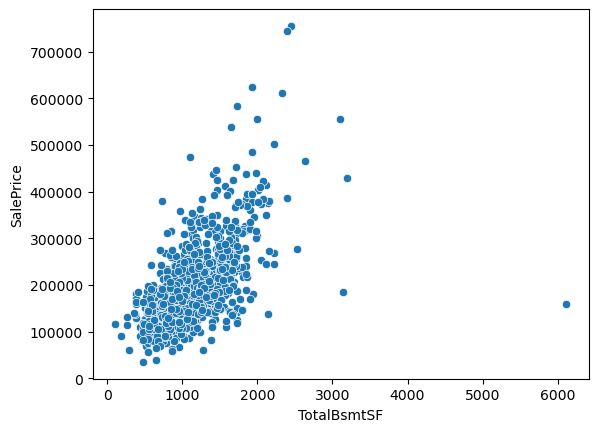

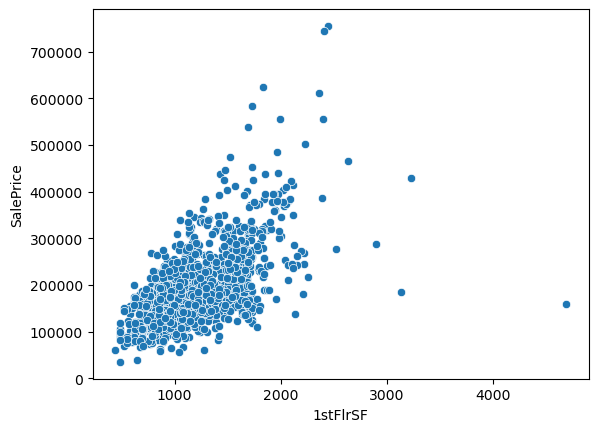

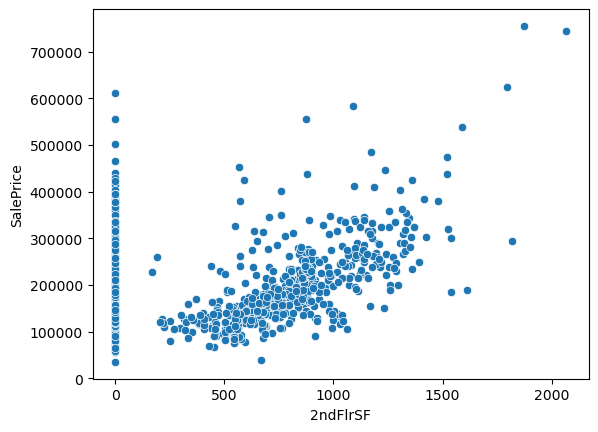

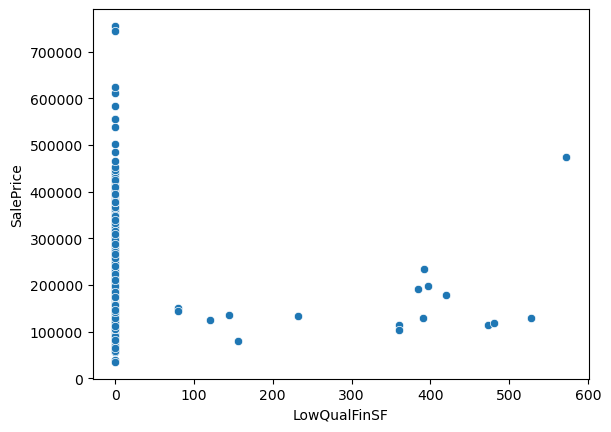

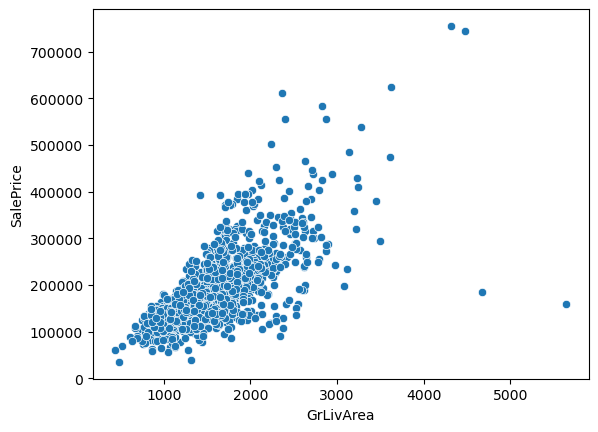

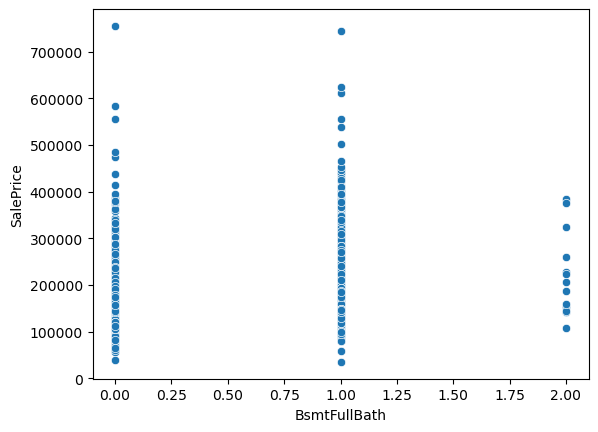

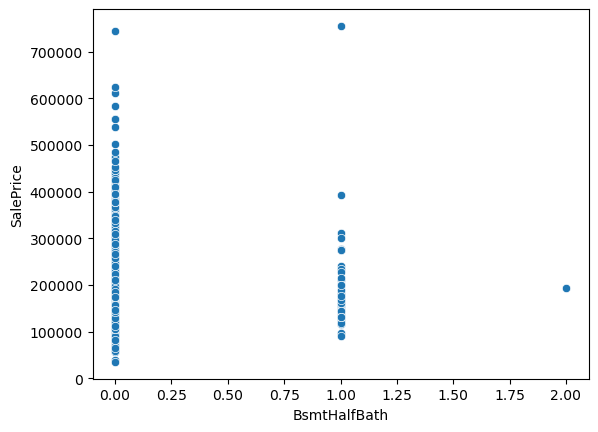

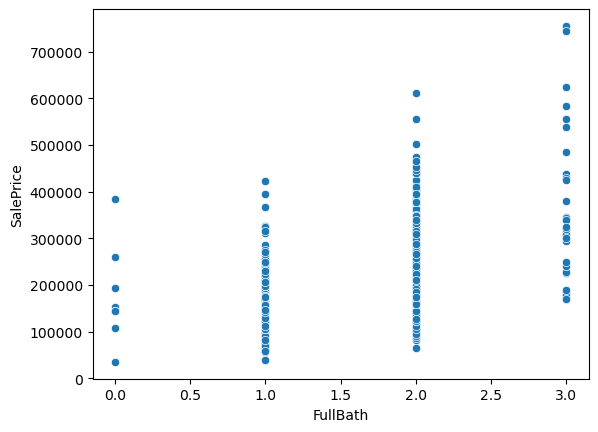

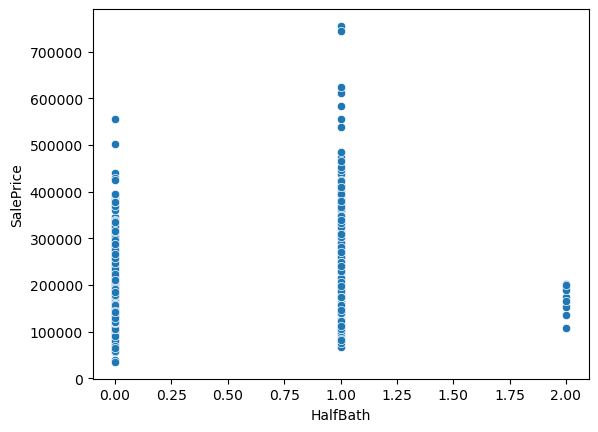

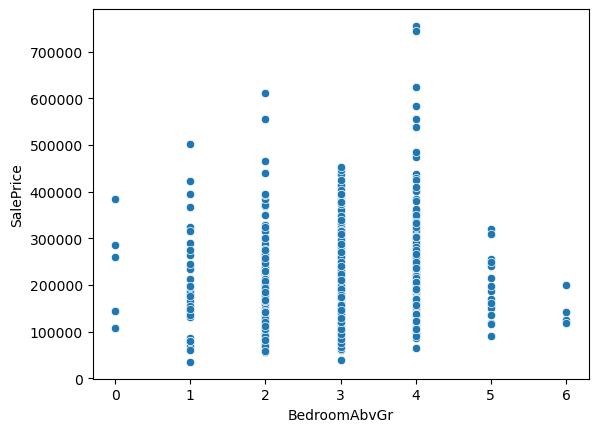

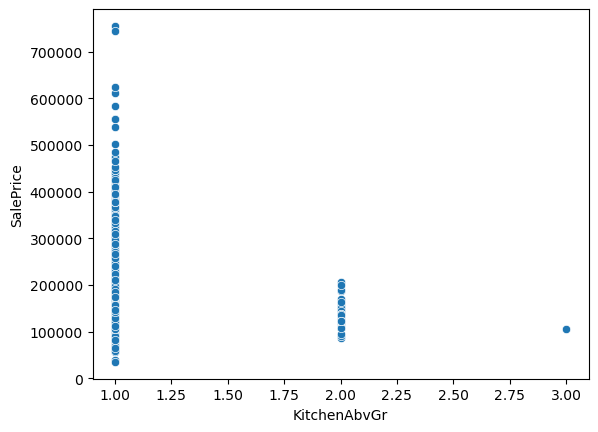

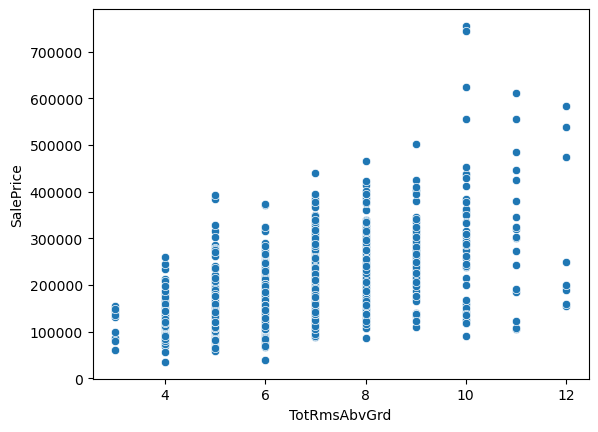

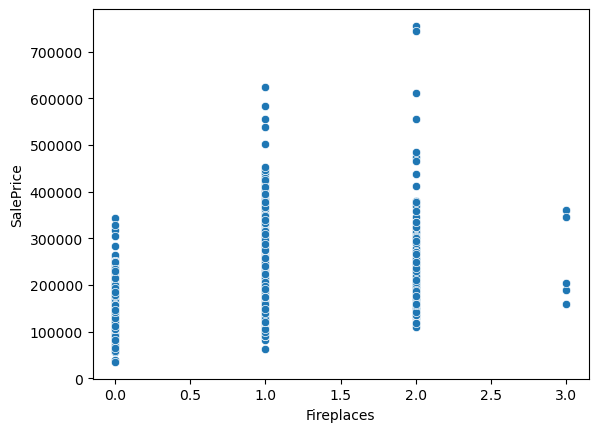

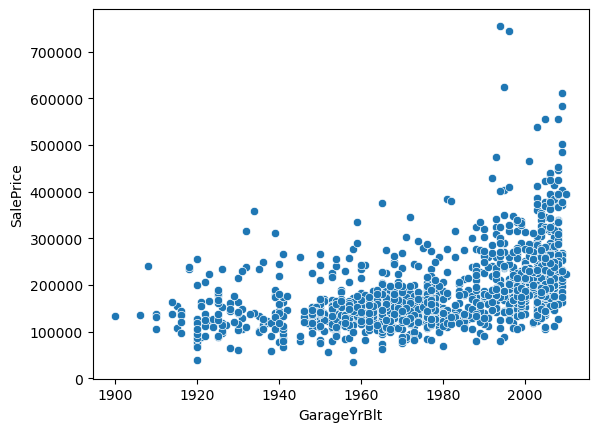

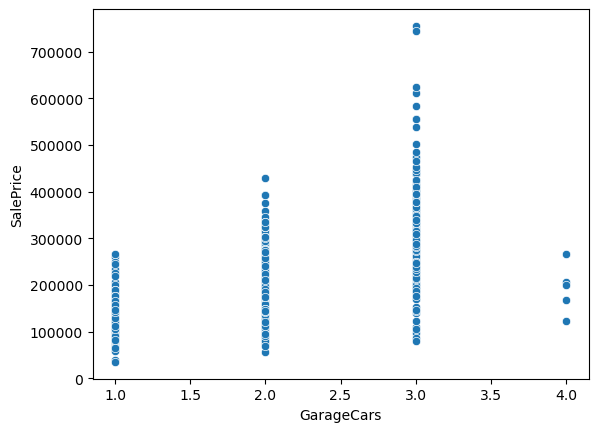

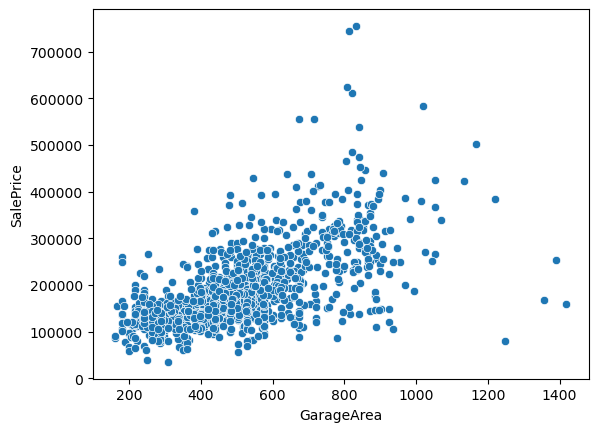

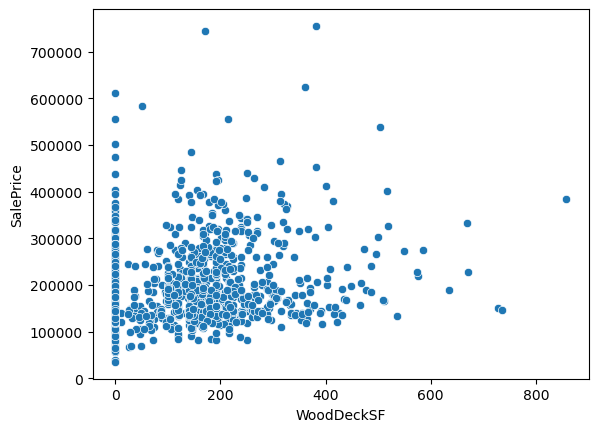

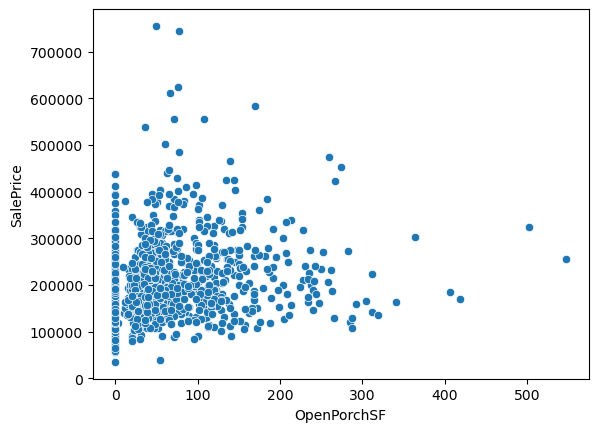

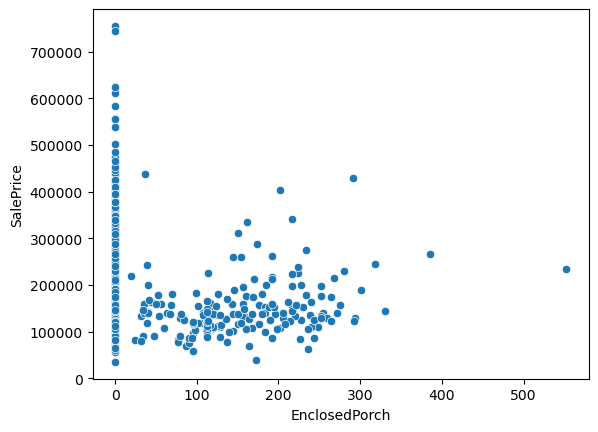

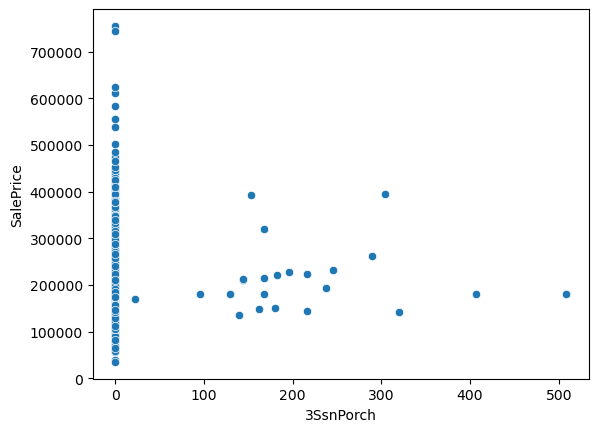

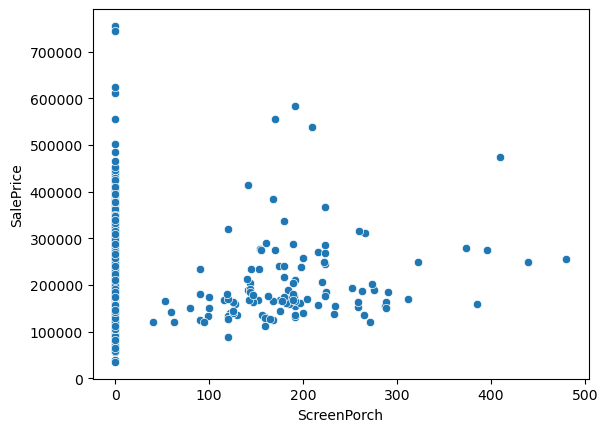

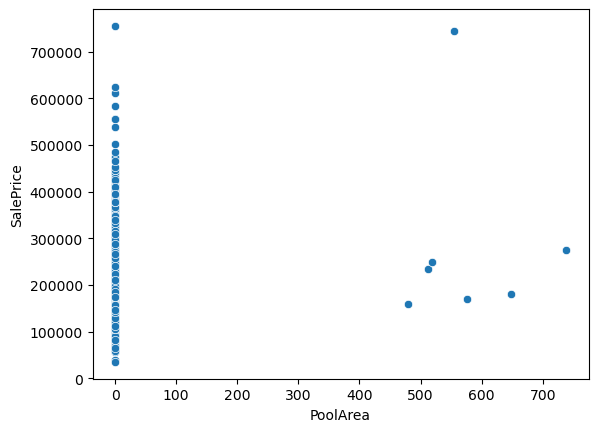

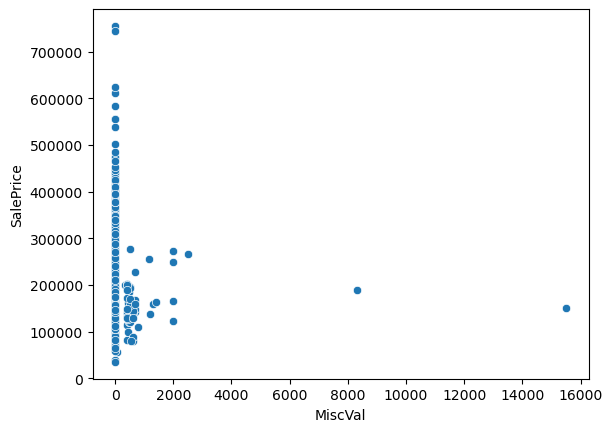

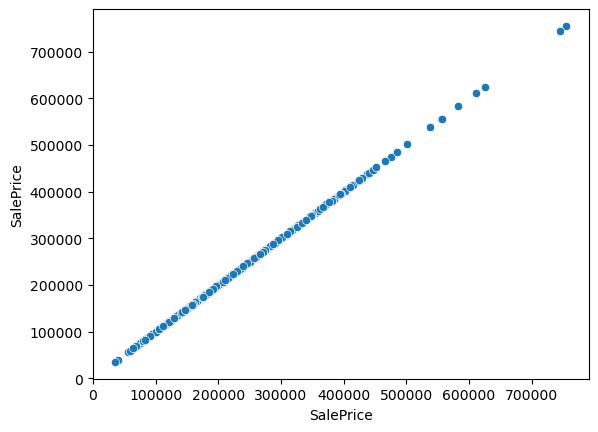

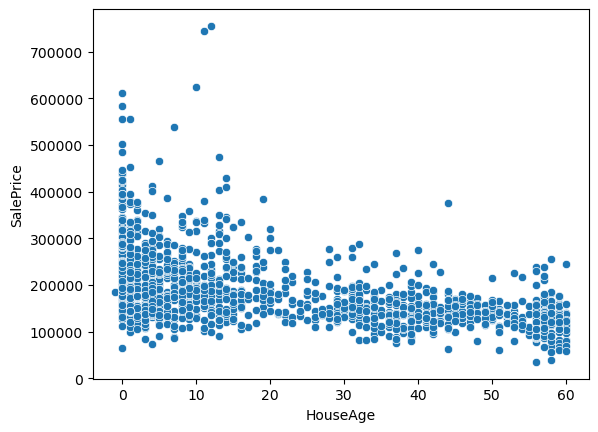

In [21]:
# Numeric column analysis With Dependent Variable Sales Price
for i, col in enumerate(house_num_col):
    numeric_col_plot(i, col)

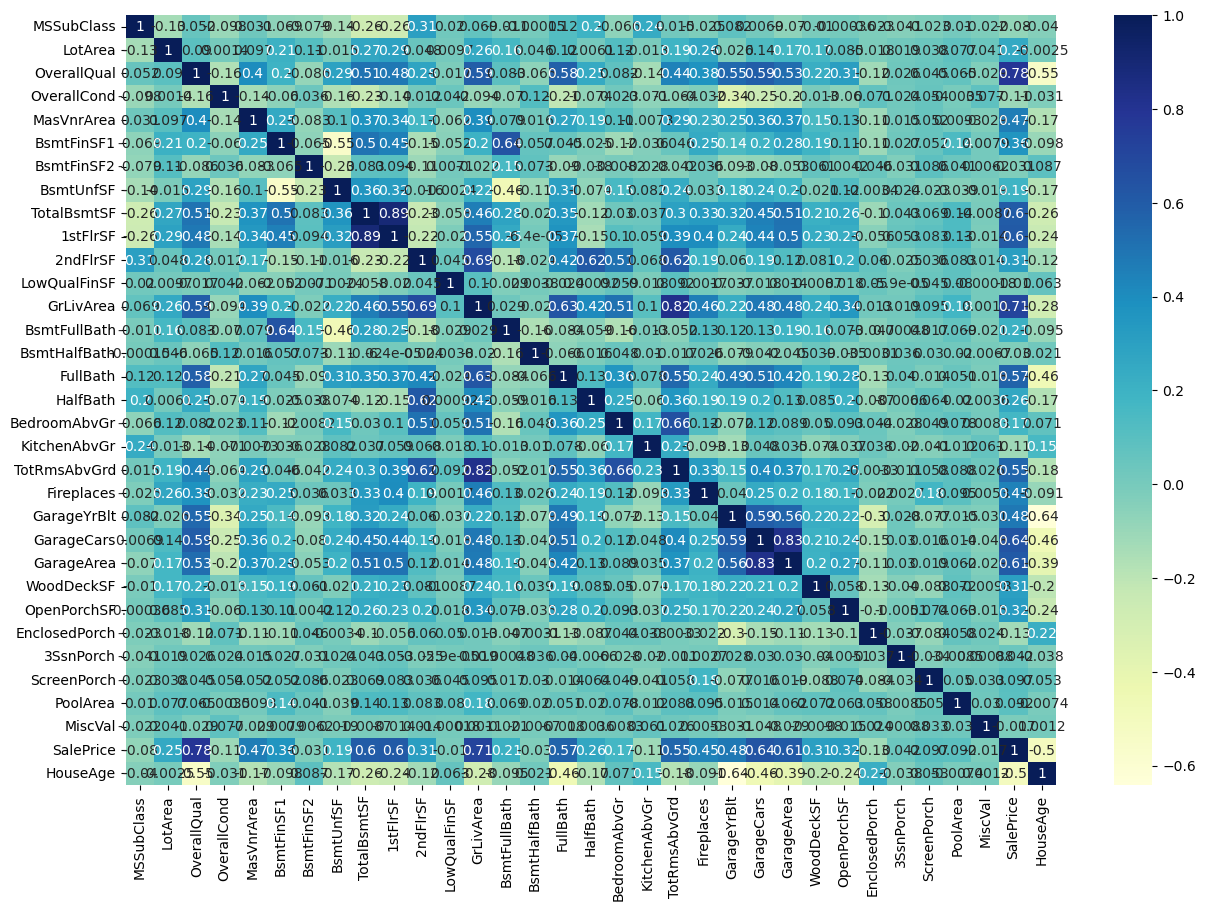

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(house_data.corr(),cmap="YlGnBu",annot=True)
plt.show()

## Inferences from Numeric Variables

From above scatter plots and heat map it is observed that

SalePrice is positive correlated to the OverallQual

SalePrice is positive correlated to the TotalBsmtSF

SalePrice is positive correlated to the 1stFlrSF

SalePrice is positive correlated to the GrLivArea

SalePrice is positive correlated to the FullBath

SalePrice is positive correlated to the TotRmsAbvGrd

SalePrice is positive correlated to the GarageCars

SalePrice is positive correlated to the GarageArea

SalePrice is negative correlated to the HouseAge

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

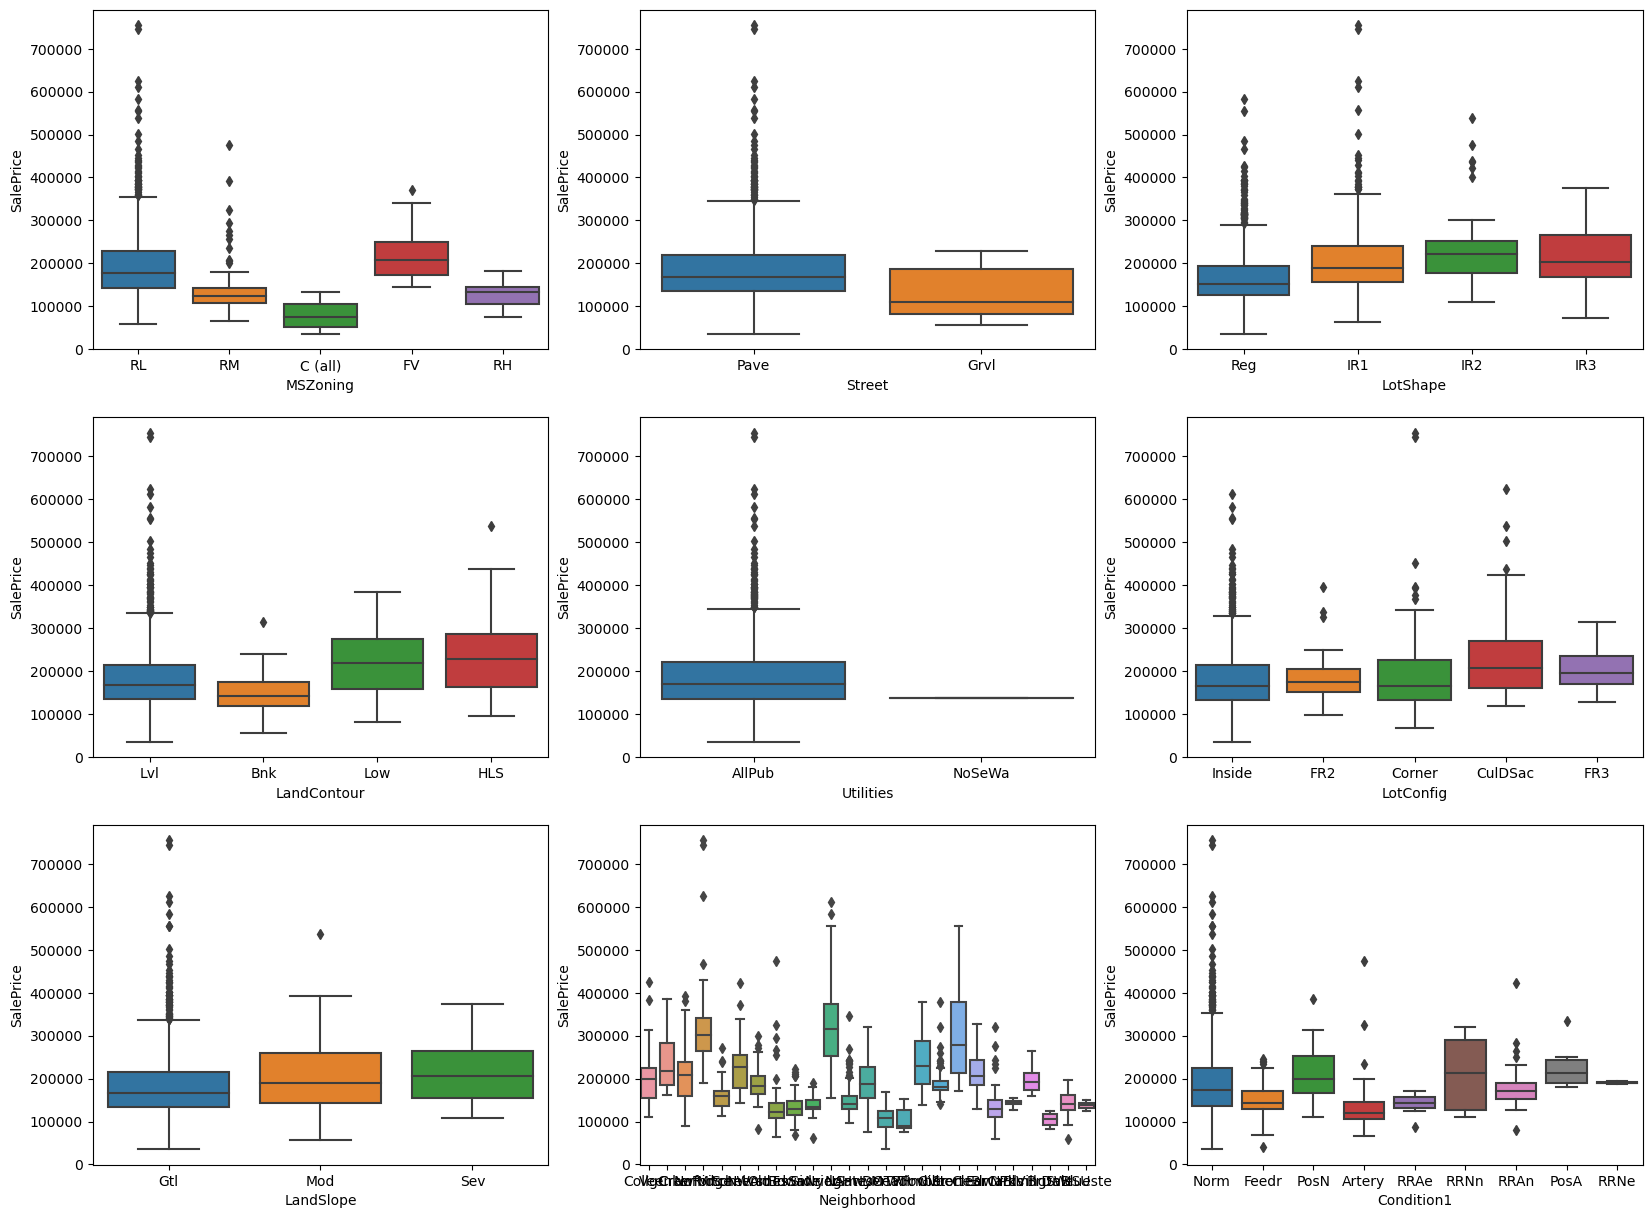

In [23]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x='MSZoning',y='SalePrice',data=house_data)

plt.subplot(3,3,2)
sns.boxplot(x='Street',y='SalePrice',data=house_data)

plt.subplot(3,3,3)
sns.boxplot(x='LotShape',y='SalePrice',data=house_data)

plt.subplot(3,3,4)
sns.boxplot(x='LandContour',y='SalePrice',data=house_data)

plt.subplot(3,3,5)
sns.boxplot(x='Utilities',y='SalePrice',data=house_data)

plt.subplot(3,3,6)
sns.boxplot(x='LotConfig',y='SalePrice',data=house_data)

plt.subplot(3,3,7)
sns.boxplot(x='LandSlope',y='SalePrice',data=house_data)

plt.subplot(3,3,8)
sns.boxplot(x='Neighborhood',y='SalePrice',data=house_data)

plt.subplot(3,3,9)
sns.boxplot(x='Condition1',y='SalePrice',data=house_data)

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

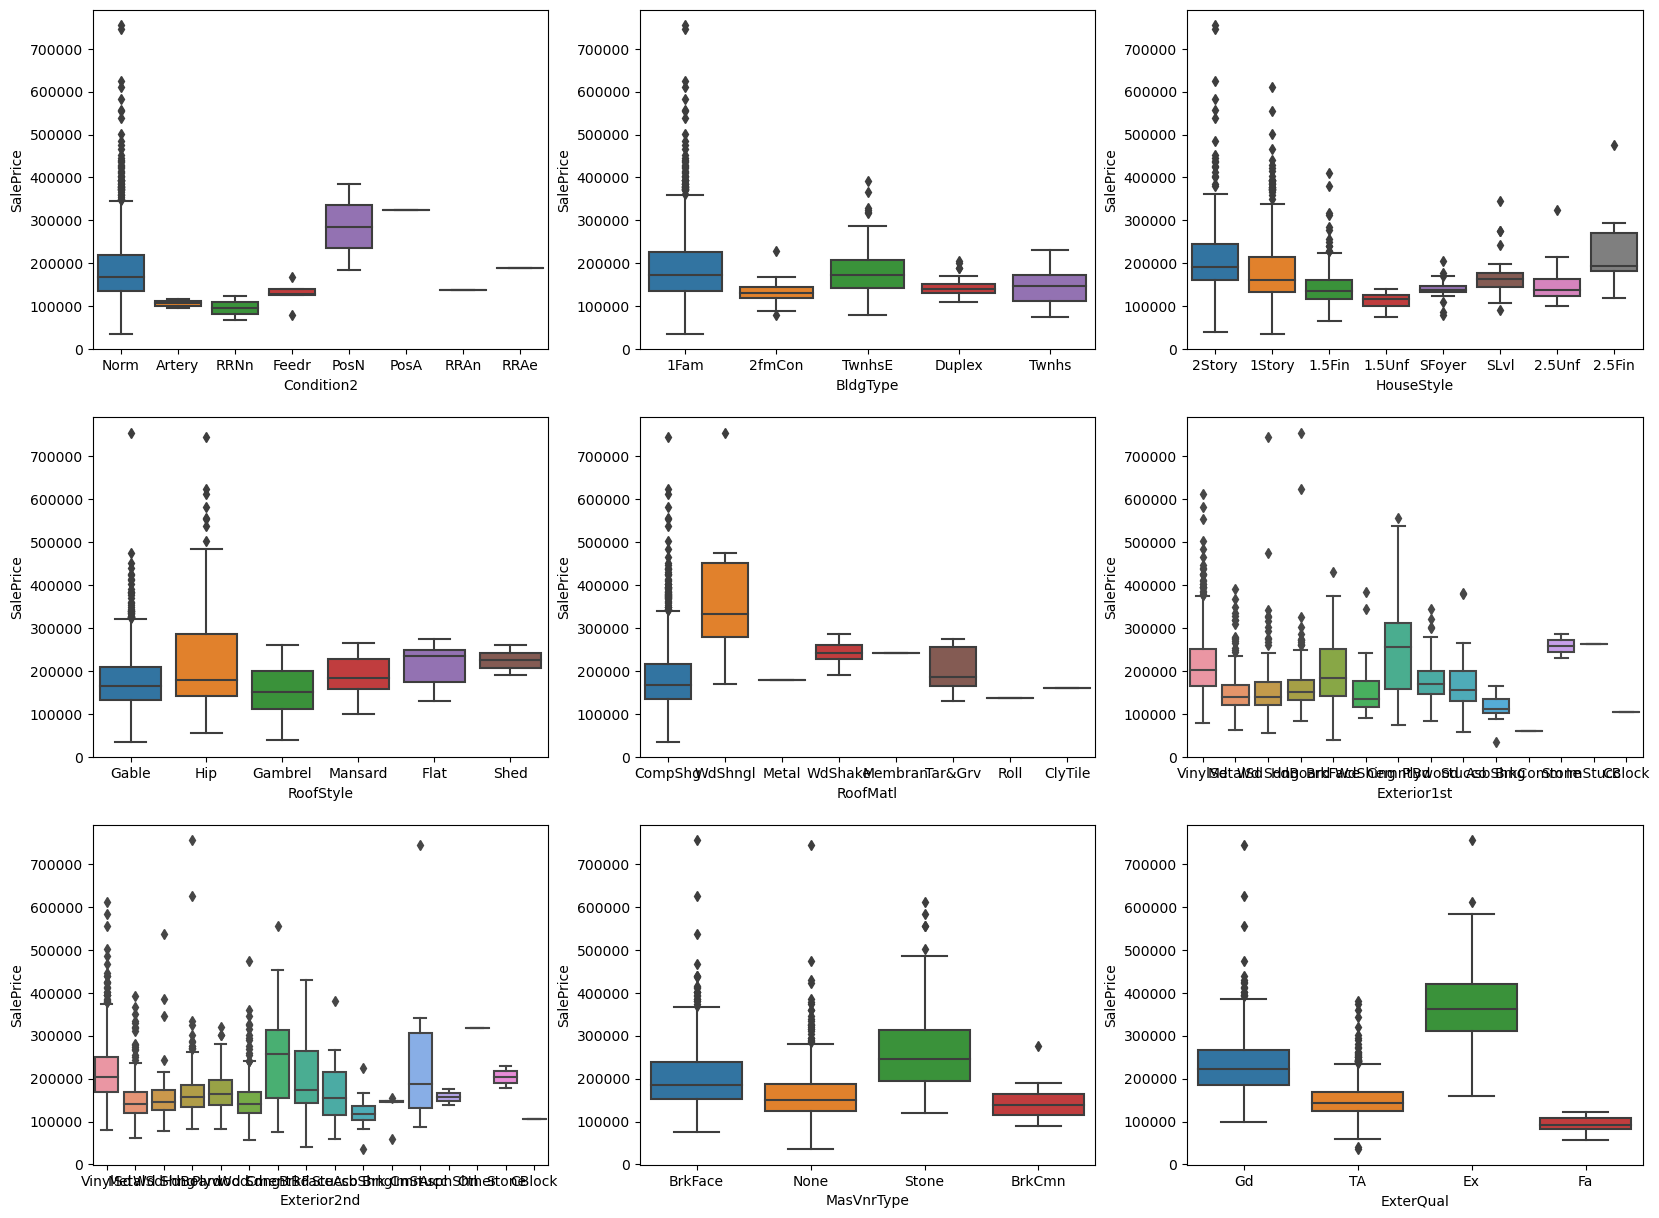

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Condition2',y='SalePrice',data=house_data)

plt.subplot(3,3,2)
sns.boxplot(x='BldgType',y='SalePrice',data=house_data)

plt.subplot(3,3,3)
sns.boxplot(x='HouseStyle',y='SalePrice',data=house_data)

plt.subplot(3,3,4)
sns.boxplot(x='RoofStyle',y='SalePrice',data=house_data)

plt.subplot(3,3,5)
sns.boxplot(x='RoofMatl',y='SalePrice',data=house_data)

plt.subplot(3,3,6)
sns.boxplot(x='Exterior1st',y='SalePrice',data=house_data)

plt.subplot(3,3,7)
sns.boxplot(x='Exterior2nd',y='SalePrice',data=house_data)

plt.subplot(3,3,8)
sns.boxplot(x='MasVnrType',y='SalePrice',data=house_data)

plt.subplot(3,3,9)
sns.boxplot(x='ExterQual',y='SalePrice',data=house_data)

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

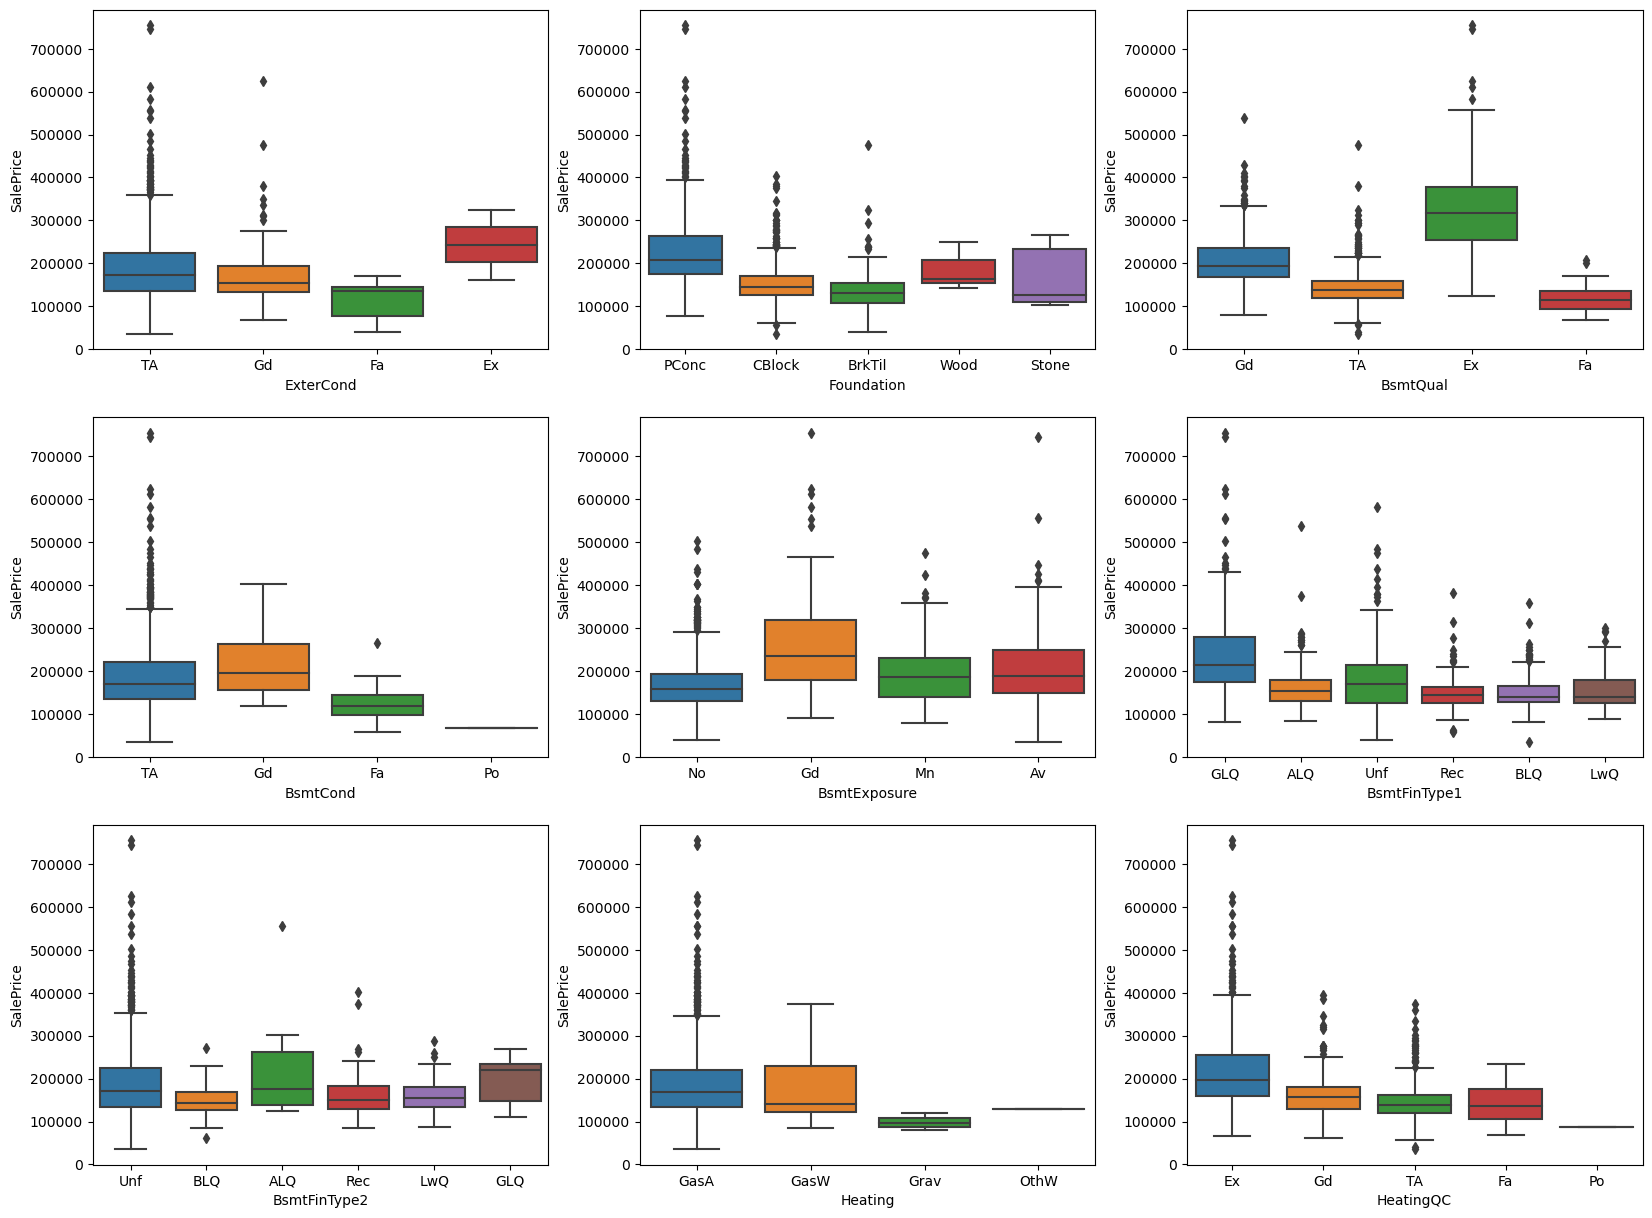

In [25]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='ExterCond',y='SalePrice',data=house_data)

plt.subplot(3,3,2)
sns.boxplot(x='Foundation',y='SalePrice',data=house_data)

plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual',y='SalePrice',data=house_data)

plt.subplot(3,3,4)
sns.boxplot(x='BsmtCond',y='SalePrice',data=house_data)

plt.subplot(3,3,5)
sns.boxplot(x='BsmtExposure',y='SalePrice',data=house_data)

plt.subplot(3,3,6)
sns.boxplot(x='BsmtFinType1',y='SalePrice',data=house_data)

plt.subplot(3,3,7)
sns.boxplot(x='BsmtFinType2',y='SalePrice',data=house_data)

plt.subplot(3,3,8)
sns.boxplot(x='Heating',y='SalePrice',data=house_data)

plt.subplot(3,3,9)
sns.boxplot(x='HeatingQC',y='SalePrice',data=house_data)

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

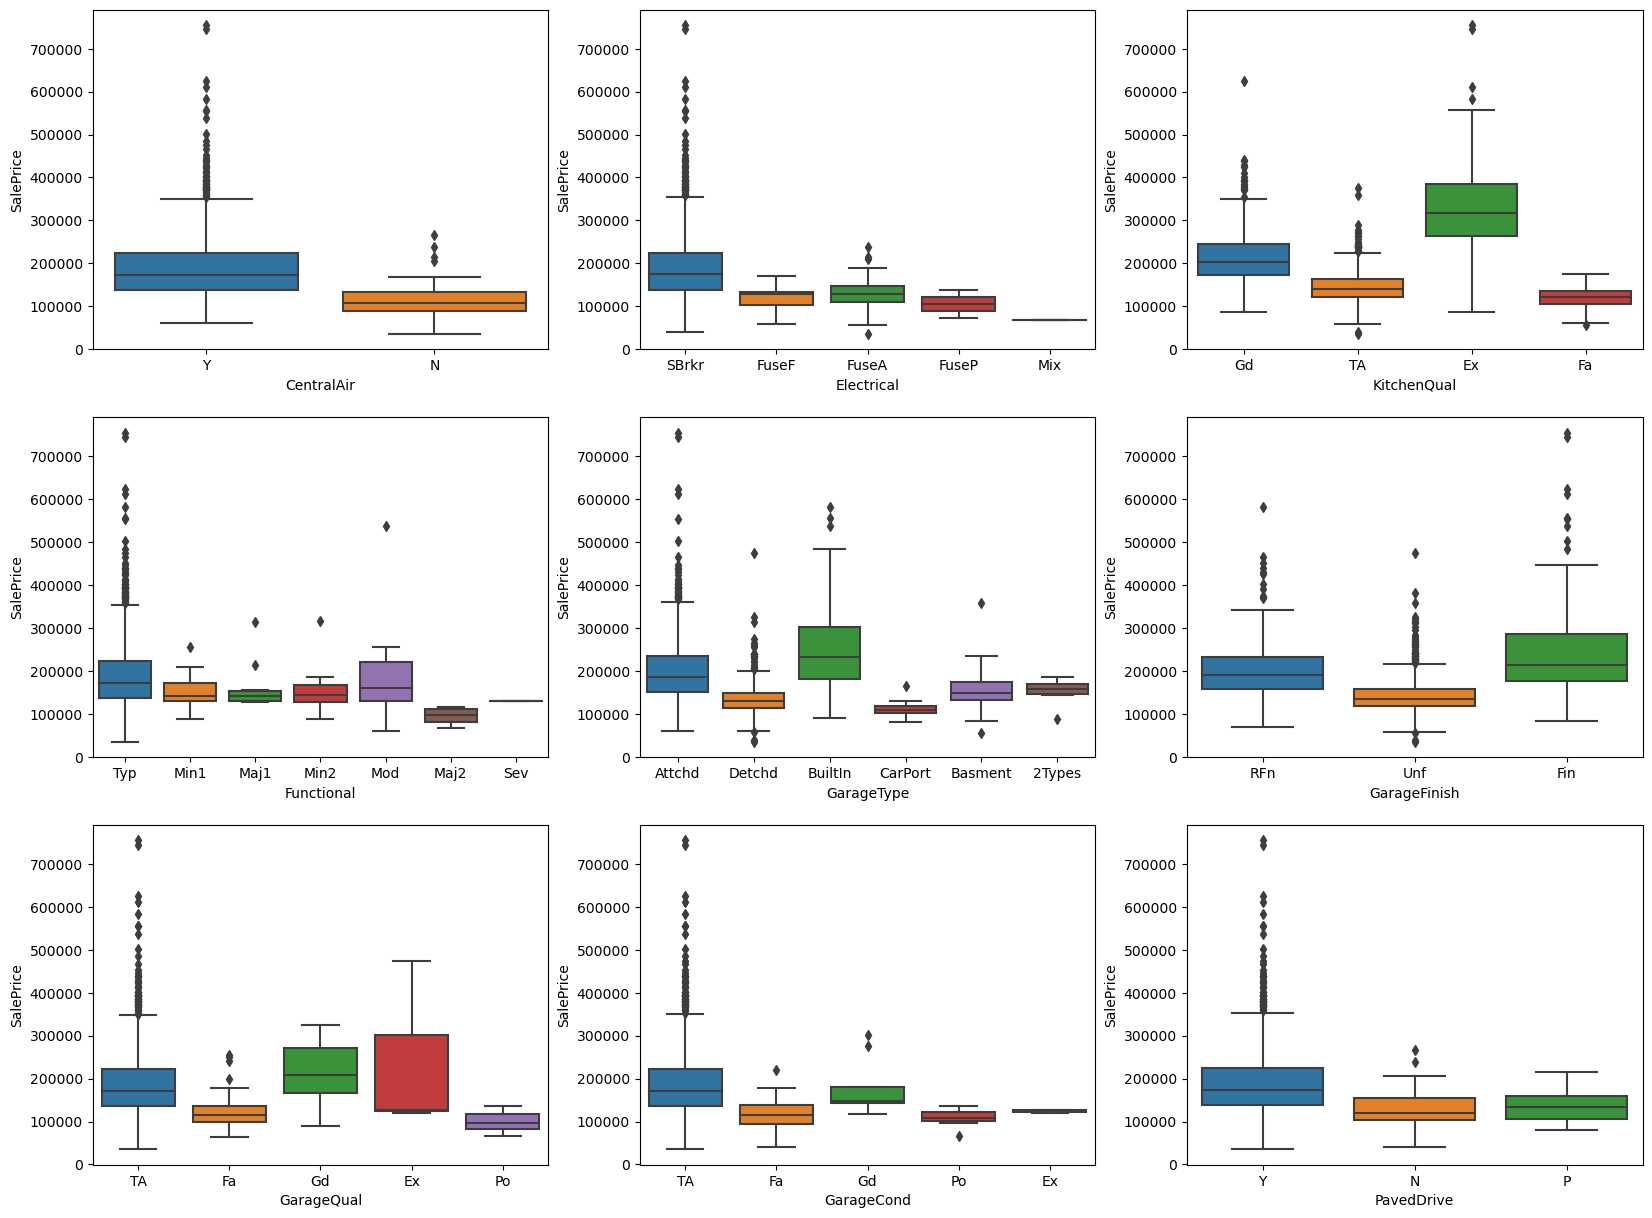

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='CentralAir',y='SalePrice',data=house_data)

plt.subplot(3,3,2)
sns.boxplot(x='Electrical',y='SalePrice',data=house_data)

plt.subplot(3,3,3)
sns.boxplot(x='KitchenQual',y='SalePrice',data=house_data)

plt.subplot(3,3,4)
sns.boxplot(x='Functional',y='SalePrice',data=house_data)

plt.subplot(3,3,5)
sns.boxplot(x='GarageType',y='SalePrice',data=house_data)

plt.subplot(3,3,6)
sns.boxplot(x='GarageFinish',y='SalePrice',data=house_data)

plt.subplot(3,3,7)
sns.boxplot(x='GarageQual',y='SalePrice',data=house_data)

plt.subplot(3,3,8)
sns.boxplot(x='GarageCond',y='SalePrice',data=house_data)

plt.subplot(3,3,9)
sns.boxplot(x='PavedDrive',y='SalePrice',data=house_data)

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

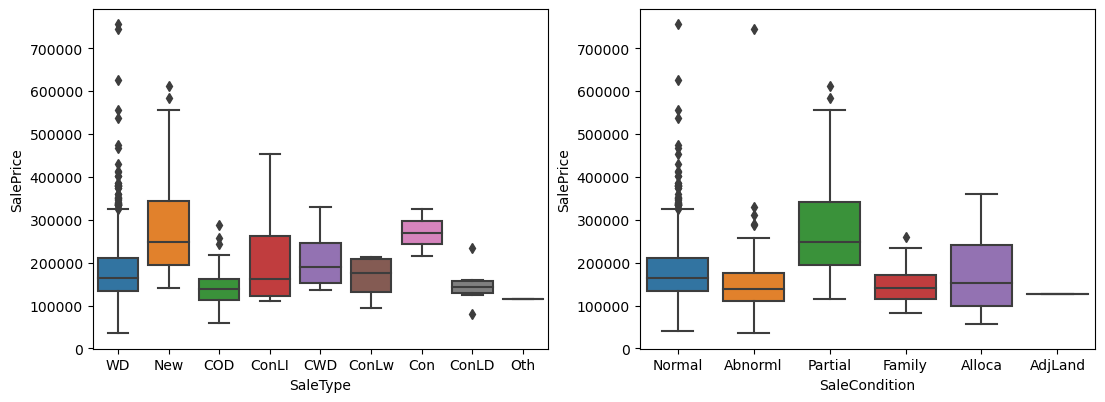

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='SaleType',y='SalePrice',data=house_data)

plt.subplot(3,3,2)
sns.boxplot(x='SaleCondition',y='SalePrice',data=house_data)

## Inference from Categorical Variables
MsZoning with of type 'FV' has high Saleprice and type 'C' has least sale price

The Street of type 'Pave' has more Sale Price when compared to 'Grvl'

LotShape of 'IR2' has high Saleprice and type 'Reg' has least sale price

LandContour of 'HLS' has high Saleprice and type 'Bnk' has least sale price

Utilities column have most of its values as 'AllPub' So its not an important column.

Exterior Quality of type 'Ex' has the highest SalePrice and and 'Fa' has least sale price.

Basement Quality of type 'Ex' has the highest SalePrice.

House having CentralAir has high Saleprice

Kitchen Quality of type 'Ex' has the highest SalePrice.

Garage Type of type 'BuiltIn' has the highest SalePrice.

Garage Quality of type 'Ex' has the highest SalePrice.

House having Sale Type 'New' has the highest SalePrice.

House with SaleCondition as 'Partial' has the hightest SalePrice

In [28]:
cat_columns = house_data.dtypes[house_data.dtypes == "object"].index
cat_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
house_data.ExterQual.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},inplace = True)
house_data.ExterCond.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},inplace = True)
house_data.BsmtQual.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},inplace = True)
house_data.BsmtCond.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},inplace = True)
house_data.BsmtExposure.replace({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0},inplace = True)
house_data.BsmtFinType1.replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},inplace = True)
house_data.BsmtFinType2.replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},inplace = True)
house_data.HeatingQC.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},inplace = True)
house_data.CentralAir.replace({'Y':1,'N':0},inplace = True)
house_data.KitchenQual.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},inplace = True)
house_data.Functional.replace({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1},inplace = True)
house_data.GarageFinish.replace({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0},inplace = True)
house_data.GarageQual.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},inplace = True)
house_data.GarageCond.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},inplace = True)
house_data.PavedDrive.replace({'P':2,'Y':1,'N':0},inplace = True)

In [30]:
#create dummies of rest of the cat varibales
dummies_df = pd.get_dummies(house_data[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummies_df

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   
1459            0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0                0             0             1                0   
1                0             0             1                0   
2                0             0             0                0   
3                0             0             0                0   
4                0             0             0                0   
...            ...           ...           ...              ...   
1455             0             0             1                0   
1456             0             0             1                0   
1457             0             0             1                0   
1458             0             0             1                0   
1459             0             0             1                0   

      LandContour_Low  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                   0  ...               0               0             0   
1                   0  ...               0               0             0   
2                   0  ...               0               0             0   
3                   0  ...               0               0             0   
4                   0  ...               0               0             0   
...               ...  ...             ...             ...           ...   
1455                0  ...               0               0             0   
1456                0  ...               0               0             0   
1457                0  ...               0               0             0   
1458                0  ...               0               0             0   
1459                0  ...               0               0             0   

      SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                0            1                      0                     0   
1                0            1                      0                     0   
2                0            1                      0                     0   
3                0            1                      0                     0   
4                0            1                      0                     0   
...            ...          ...                    ...                   ...   
1455             0            1                      0                     0   
1456             0            1                      0                     0   
1457             0            1                      0                     0   
1458             0            1                      0                     0   
1459             0            1                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                        0                     1                      0  
1                        0                     1                      0  
2                        0                     1                      0  
3                        0                     0                      0  
4                        0                     1                      0  
...   

In [31]:
# Adding the dummies data to the house_data dataframe
house_data = pd.concat([house_data, dummies_df], axis=1)
house_data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... SaleType_ConLI SaleType_ConLw  \
0    Inside       Gtl      CollgCr  ...              0              0   
1       FR2       Gtl      Veenker  ...              0              0   
2    Inside       Gtl      CollgCr  ...              0              0   
3    Corner       Gtl      Crawfor  ...              0              0   
4       FR2       Gtl      NoRidge  ...              0              0   

  SaleType_New SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0            0            0            1                      0   
1            0            0            1                      0   
2            0            0            1                      0   
3            0            0            1                      0   
4            0            0            1                      0   

  SaleCondition_Alloca SaleCondition_Family SaleCondition_Normal  \
0                    0                    0                    1   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    0                    0   
4                    0                    0                    1   

  SaleCondition_Partial  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 211 columns]

In [32]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'])
house_data.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0          60     8450            7            5       196.0          4   
1          20     9600            6            8         0.0          3   
2          60    11250            7            5       162.0          4   
3          70     9550            7            5         0.0          3   
4          60    14260            8            5       350.0          4   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  ...  SaleType_ConLI  \
0          3         4         3             1  ...               0   
1          3         4         3             4  ...               0   
2          3         4         3             2  ...               0   
3          3         3         4             1  ...               0   
4          3         4         3             3  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 188 columns]

In [33]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(house_data[house_num_col]))
# Outlier Removed Records
selected = house_data[house_num_col][(z < 3).all(axis=1)]
house_data = house_data.loc[selected.index]
house_data

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0             60     8450            7            5       196.0          4   
2             60    11250            7            5       162.0          4   
4             60    14260            8            5       350.0          4   
6             20    10084            8            5       186.0          4   
10            20    11200            5            5         0.0          3   
...          ...      ...          ...          ...         ...        ...   
1448          50    11767            4            7         0.0          3   
1451          20     9262            8            5       194.0          4   
1454          20     7500            7            5         0.0          4   
1455          60     7917            6            5         0.0          3   
1456          20    13175            6            6       119.0          3   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  ...  SaleType_ConLI  \
0             3         4         3             1  ...               0   
2             3         4         3             2  ...               0   
4             3         4         3             3  ...               0   
6             3         5         3             3  ...               0   
10            3         3         3             1  ...               0   
...         ...       ...       ...           ...  ...             ...   
1448          3         2         3             1  ...               0   
1451          3         4         3             1  ...               0   
1454          3         4         3             1  ...               0   
1455          3         4         3             1  ...               0   
1456          3         4         3             1  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
2                  0             0             0            1   
4                  0             0             0            1   
6                  0             0             0            1   
10                 0             0             0            1   
...              ...           ...           ...          ...   
1448               0             0             0            1   
1451               0             1             0            0   
1454               0             0             0            1   
1455               0             0             0            1   
1456               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
2                         0                     0                     0   
4                         0                     0                     0   
6                         0                     0                     0   
10                        0                     0                     0   
...                     ...                   ...                   ...   
1448                      0                     0                     0   
1451                      0                     0                     0   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
2                        1                      0  
4                        1                      0  
6                        1                      0  
10                       1                      0  
...                    ...                    ...  
1448                     1                      0  
1451                     0                      1  
1454                     1    

## Data Modeling

In [34]:
# Split the data in to train and test
house_data.shape

(956, 188)

In [35]:
from sklearn.model_selection import train_test_split

#y to contain only target variable
y=house_data.pop('SalePrice')

#X is all remainign variable also our independent variables
X=house_data

# scale
scaler = StandardScaler()
scaler.fit(X)

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(669, 187)
(287, 187)


In [37]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9425862958246359
0.8969617105912806


## Build model and feature selection using RFE

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
from sklearn.feature_selection import RFE

#Cut down number of features to 100 using automated approach
rfe = RFE(lr,step = 100)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=100)

In [40]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotArea', False, 2),
 ('OverallQual', True, 1),
 ('OverallCond', False, 2),
 ('MasVnrArea', False, 2),
 ('ExterQual', True, 1),
 ('ExterCond', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 2),
 ('BsmtExposure', False, 2),
 ('BsmtFinType1', False, 2),
 ('BsmtFinSF1', False, 2),
 ('BsmtFinType2', False, 2),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', False, 2),
 ('HeatingQC', False, 2),
 ('CentralAir', True, 1),
 ('1stFlrSF', False, 2),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 2),
 ('GrLivArea', False, 2),
 ('BsmtFullBath', False, 2),
 ('BsmtHalfBath', False, 2),
 ('FullBath', False, 2),
 ('HalfBath', False, 2),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 2),
 ('KitchenQual', False, 2),
 ('TotRmsAbvGrd', False, 2),
 ('Functional', True, 1),
 ('Fireplaces', False, 2),
 ('GarageYrBlt', False, 2),
 ('GarageFinish', False, 2),
 ('GarageCars', True, 1),
 ('GarageArea', False, 2),
 ('GarageQual', False, 2),
 ('G

In [41]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [42]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [43]:
#Print Columns selected by RFE. We will manually eliminate for these columns
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'ExterQual', 'ExterCond', 'BsmtQual', 'CentralAir',
       'BedroomAbvGr', 'Functional', 'GarageCars', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2',
       'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe'

In [44]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'HouseAge', 'Street_Pave', 'LotShape_Reg', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_NPkVill', 'Neighborhood_Somerst', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
  

In [45]:
# Taking 100 columns supported by RFE for regression
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe) #Adding Constant

In [46]:
X_train_rfe.shape

(669, 94)

### Model using RFE, P Values and VIF Analysis

In [47]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     32.59
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          2.26e-176
Time:                        16:23:30   Log-Likelihood:                -7706.5
No. Observations:                 669   AIC:                         1.560e+04
Df Residuals:                     576   BIC:                         1.602e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.815e+

                 Features     VIF
65  Exterior2nd_CmentBd    inf   
57  Exterior1st_CemntBd    inf   
10  MSZoning_RL            295.12
6   Functional             285.82
1   ExterQual              141.26
3   BsmtQual               116.75
2   ExterCond              114.54
0   OverallQual            103.01
92  SaleCondition_Partial  66.25 
88  SaleType_New           65.46 
4   CentralAir             53.70 
62  Exterior1st_VinylSd    52.03 
40  Condition1_Norm        51.26 
11  MSZoning_RM            41.90 
70  Exterior2nd_VinylSd    40.94 
5   BedroomAbvGr           30.75 
8   MSZoning_FV            26.11 
7   GarageCars             23.46 
75  Foundation_PConc       18.79 
58  Exterior1st_HdBoard    15.06 
74  Foundation_CBlock      13.33 
66  Exterior2nd_HdBoard    10.77 
63  Exterior1st_Wd Sdng    10.38 
73  MasVnrType_None        10.05 
71  Exterior2nd_Wd Sdng    8.06  
60  Exterior1st_Plywood    7.30  
67  Exterior2nd_MetalSd    6.89  
68  Exterior2nd_Plywood    6.23  
72  MasVnrType

In [48]:
#delete columns hose are not selected by RFE
X_train = X_train[col]
X_test = X_test[col]
X_train

OverallQual  ExterQual  ExterCond  BsmtQual  CentralAir  BedroomAbvGr  \
87    6            4          3          4         1           2              
1347  8            4          3          5         1           3              
904   5            3          3          3         1           3              
1273  6            3          3          3         1           2              
521   6            3          3          3         1           3              
444   7            4          4          4         1           4              
71    4            3          3          3         1           2              
425   7            3          4          3         1           3              
1235  5            3          3          4         1           4              
347   6            3          3          3         1           3              
773   5            3          3          3         1           2              
1229  5            3          3          3         1           4              
0     7            4          3          4         1           3              
619   8            4          3          4         1           4              
101   6            4          3          4         1           3              
1436  4            3          3          3         1           3              
721   6            4          3          4         1           1              
1056  7            4          3          4         1           2              
834   5            3          3          3         1           3              
802   7            4          3          4         1           3              
448   6            3          3          3         1           3              
1007  4            3          3          3         1           3              
1367  5            3          3          3         1           4              
381   7            4          3          4         1           2              
399   7            4          3          4         1           2              
243   6            3          3          4         1           3              
1065  7            4          3          5         1           3              
877   9            4          3          5         1           4              
978   4            3          3          3         1           3              
846   7            4          3          4         1           3              
1250  7            4          3          3         1           3              
937   7            4          3          4         1           3              
383   6            3          3          2         0           2              
793   8            4          3          4         1           3              
372   6            3          3          4         1           2              
340   8            4          3          4         1           4              
139   6            3          3          4         1           3              
174   6            3          3          4         1           3              
1429  6            4          4          4         1           3              
117   5            3          3          4         1           2              
1431  6            3          3          4         1           2              
656   5            4          3          3         1           3              
204   5            3          3          3         1           2              
740   5            3          4          2         1           2              
903   7            4          3          4         1           3              
91    5            3          3          3         1           2              
442   5            3          3          3         1           3              
382   7            4          3          4         1           3              
1361  7            4          3          5         1           3              
1272  5            3          3          3         1    

## Advaced Linear Regression by using Ridge regression model

In [49]:
# Lets assume alpha is 0.001 and build a Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.8388321684198408


In [50]:
from sklearn.model_selection import GridSearchCV
# Tune hyperparameter
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000  ]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0  0.008797       0.006337      0.001203         0.001473        0.0001       
1  0.004600       0.001264      0.002151         0.001167        0.001        
2  0.003734       0.002801      0.001621         0.001391        0.01         
3  0.006716       0.005372      0.001992         0.001128        0.05         
4  0.001801       0.001470      0.004127         0.006518        0.1          
5  0.005022       0.006298      0.000598         0.000797        0.2          
6  0.001884       0.002351      0.005034         0.005687        0.3          
7  0.003206       0.001650      0.003869         0.004348        0.4          
8  0.004861       0.004775      0.000905         0.000801        0.5          
9  0.001602       0.001962      0.000926         0.001141        0.6          

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001} -21674.525366      -21573.296804      -25077.841351        
1  {'alpha': 0.001}  -21671.936675      -21567.376899      -25072.867127        
2  {'alpha': 0.01}   -21646.464531      -21511.174367      -25026.331814        
3  {'alpha': 0.05}   -21541.112440      -21312.890847      -24866.999038        
4  {'alpha': 0.1}    -21423.327052      -21138.933544      -24725.325442        
5  {'alpha': 0.2}    -21218.999508      -20918.164612      -24522.975704        
6  {'alpha': 0.3}    -21042.914843      -20772.485490      -24372.083286        
7  {'alpha': 0.4}    -20886.662941      -20661.966141      -24249.159551        
8  {'alpha': 0.5}    -20758.355953      -20584.874991      -24144.457007        
9  {'alpha': 0.6}    -20642.191578      -20531.056390      -24052.798670        

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0 -19960.069647      -22032.159741      -22063.578582     1667.528449      
1 -19957.702946      -22029.195215      -22059.815772     1666.807767      
2 -19934.353789      -22001.027199      -22023.870340     1660.522113      
3 -19843.944646      -21901.344032      -21893.258201     1643.393982      
4 -19751.878524      -21814.635590      -21770.820030     1632.616228      
5 -19609.695989      -21704.020452      -21594.771253     1620.237109      
6 -19531.109724      -21633.103858      -21470.339440     1604.799889      
7 -19474.395388      -21587.575992      -21371.952003     1591.547893      
8 -19429.184841      -21565.278242      -21296.430207     1578.985491      
9 -19390.151214      -21557.376676      -21234.714906     1568.077877      

   rank_test_score  split0_train_score  split1_train_score  \
0  25              -17998.884520       -17964.627607         
1  24              -17999.263084       -17965.453805         
2  23              -18002.979363       -17973.408631         
3  22              -18020.896329       -18004.194041         
4  21              -18043.901492       -18037.085349         
5  20              -18082.473673       -18087.902842         
6  18              -18123.132916       -18137.957217         
7  17              -18163.299282       -18185.030811         
8  16              -18201.413406       -18226.341946         
9  15              -18239.248676       -18262.099556         

   split2_train_score  split3_train_score  split4_train_score  \
0 -17430.616800       -18349.731367       -17863.106456         
1 -17431.626799       -18350.057698       -17863.906190         
2 -17441.201148       -18353.787381       -17871.643311         
3 -17476.059047       -18369.444491       -17903.313556         
4 -17512.152628       -18387.410882       -17940.261389         
5 -17581.484200       -18426.220488       -18003.261160         
6 -17637.567022       -18469.082821       -18060.332973         
7 -17685.646985       -18510.981928       -18113.129979         
8 -17726.428502       -18551.885748       -18159.961579         
9 -17765.001359       -18586.314148       -18200.019956         

   me

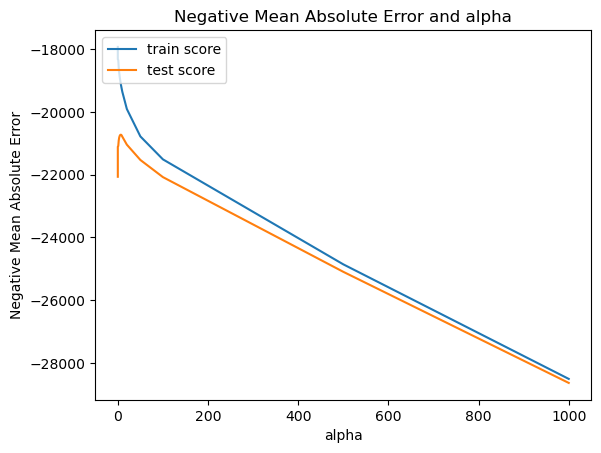

In [52]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [53]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=6.0)
 The best r2 score is obtained at alpha 6.0


In [54]:
# Model building using optimal alpha

ridge = Ridge(alpha=best_ridge_alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=6.0)

In [55]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [56]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

Features    Coefficient            Mod
0   MSSubClass           -148995.527907  148995.527907
31  Fireplaces            25863.680117   25863.680117 
57  LandContour_Lvl       25142.938455   25142.938455 
49  MSZoning_RL          -22303.121718   22303.121718 
37  GarageCond            20917.549979   20917.549979 
8   BsmtCond              19652.396710   19652.396710 
25  HalfBath             -19297.229893   19297.229893 
1   LotArea               17931.426680   17931.426680 
4   MasVnrArea            16712.223094   16712.223094 
85  Neighborhood_Somerst  15830.015827   15830.015827

In [57]:
from sklearn import metrics
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.8219
Ridge regression test r2:  0.8028


## Advaced Linear Regression by using LASSO regression model

In [58]:
## LASSO Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000  ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0  0.043633       0.006864      0.001928         0.001815        0.0001       
1  0.040809       0.005207      0.002694         0.001797        0.001        
2  0.041037       0.009067      0.001328         0.001251        0.01         
3  0.039577       0.007618      0.003969         0.005561        0.05         
4  0.033631       0.001055      0.004009         0.005348        0.1          

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001} -21674.809124      -21573.821244      -25039.132512        
1  {'alpha': 0.001}  -21674.777574      -21573.772937      -25039.120276        
2  {'alpha': 0.01}   -21674.461575      -21573.289862      -25038.997917        
3  {'alpha': 0.05}   -21673.054097      -21571.142858      -25035.395141        
4  {'alpha': 0.1}    -21671.294808      -21568.459104      -25030.480548        

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0 -19960.329488      -22032.382616      -22056.094997     1653.437332      
1 -19960.295858      -22032.378186      -22056.068966     1653.445728      
2 -19959.959561      -22032.333887      -22055.808560     1653.529718      
3 -19958.465722      -22032.136999      -22054.038964     1652.799424      
4 -19956.598439      -22031.890890      -22051.744758     1651.738864      

   rank_test_score  split0_train_score  split1_train_score  \
0  27              -17998.843347       -17964.543479         
1  26              -17998.852815       -17964.556085         
2  25              -17998.947448       -17964.682143         
3  24              -17999.367739       -17965.242399         
4  23              -17999.893110       -17965.942719         

   split2_train_score  split3_train_score  split4_train_score  \
0 -17430.694332       -18349.699197       -17863.031265         
1 -17430.714051       -18349.710801       -17863.048692         
2 -17430.911243       -18349.826835       -17863.222959         
3 -17431.795795       -18350.346736       -17863.997481         
4 -17432.899423       -18350.999899       -17864.965633         

   mean_train_score  std_train_score  
0 -17921.362324      295.126410       
1 -17921.376489      295.123398       
2 -17921.518125      295.093281       
3 -17922.150030      294.957943       
4 -17922.940157      294.790463

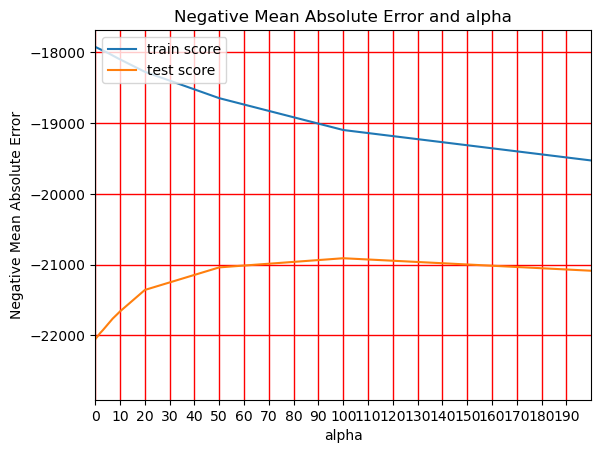

In [60]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)

plt.show()

In [61]:
bestalpha_lasso = model_cv.best_params_["alpha"]
print(" The best r2 score is obtained at alpha {0}".format(model_cv.best_params_["alpha"]))

 The best r2 score is obtained at alpha 100


In [62]:
lasso = Lasso(alpha=bestalpha_lasso)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",round(r2_score(y_true=y_train,y_pred=y_train_pred),4))
print("Lasso Regression test r2:",round(r2_score(y_true=y_test,y_pred=y_test_pred),4))

Lasso Regression train r2: 0.8203
Lasso Regression test r2: 0.8014


In [63]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [64]:
lasso_coef.sort_values(by='mod',ascending=False).head(10)

Feature           Coef            mod
0   OverallQual          -142831.969774  142831.969774
31  Neighborhood_NridgHt  35120.518936   35120.518936 
57  Exterior1st_CemntBd   33894.965957   33894.965957 
37  Neighborhood_Timber   33523.389002   33523.389002 
85  SaleType_ConLD        28547.177786   28547.177786 
49  HouseStyle_SFoyer    -24561.177424   24561.177424 
32  Neighborhood_OldTown  20079.452640   20079.452640 
58  Exterior1st_HdBoard   20019.393195   20019.393195 
8   MSZoning_FV           19789.422980   19789.422980 
42  Condition1_PosN       19678.830700   19678.830700

## Inference and Conclusion

* Overall quality: If the Overall Quality is Excellent than the SalePrice is higher

* Neighborhood : If the location is near Northridge Heights, Timberland and Old Town than the SalePrice is higher

* Exterior1st : If the Exterior covering on house is of Cement Board or Hard Board than the SalePrice is higher

* HouseStyle: If the style of the house is Split Foyer than the SalePrice is higher 

* MSZoning: If the zone of the house is Floating Village Residential than the SalePrice is higher

* Condition1: If the Proximity to various conditions such as Near positive off-site feature--park, greenbelt, etc. than also SalePrice is higher

## Subjective Questions

In [65]:
## Subjective questions
#alpha = 12
ridge = Ridge(alpha=12)
ridge.fit(X_train, y_train)

Ridge(alpha=12)

In [66]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("ridge Regression train r2:",round(r2_score(y_true=y_train,y_pred=y_train_pred),4))
print("ridge Regression test r2:",round(r2_score(y_true=y_test,y_pred=y_test_pred),4))


ridge Regression train r2: 0.8126
ridge Regression test r2: 0.8033


In [67]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [68]:

#selecting the top 3 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(3)

Features    Coefficient            Mod
0   MSSubClass      -146679.053023  146679.053023
31  Fireplaces       21212.232843   21212.232843 
57  LandContour_Lvl  19618.159350   19618.159350

In [69]:
## Lasso double
lasso = Lasso(alpha=200)
lasso.fit(X_train,y_train)

Lasso(alpha=200)

In [70]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",round(r2_score(y_true=y_train,y_pred=y_train_pred),4))
print("Lasso Regression test r2:",round(r2_score(y_true=y_test,y_pred=y_test_pred),4))


Lasso Regression train r2: 0.8056
Lasso Regression test r2: 0.803


In [71]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']


In [72]:
lasso_coef.sort_values(by='mod',ascending=False).head(3)

Feature           Coef            mod
0   OverallQual          -139735.673796  139735.673796
31  Neighborhood_NridgHt  31201.750708   31201.750708 
57  Exterior1st_CemntBd   30072.800370   30072.800370

In [73]:
# Lasso Regression after removing top 5 predictors
X_test_5 = X_test.drop(['OverallQual','Neighborhood_NridgHt','Exterior1st_CemntBd','Neighborhood_Timber','SaleType_ConLD'],axis=1)
X_train_5 = X_train.drop(['OverallQual','Neighborhood_NridgHt','Exterior1st_CemntBd','Neighborhood_Timber','SaleType_ConLD'],axis=1)

lasso = Lasso(alpha=100)
lasso.fit(X_train_5,y_train)

y_train_pred = lasso.predict(X_train_5)
y_test_pred = lasso.predict(X_test_5)

print("Lasso Regression train r2:",round(r2_score(y_true=y_train,y_pred=y_train_pred),4))
print("Lasso Regression test r2:",round(r2_score(y_true=y_test,y_pred=y_test_pred),4))

Lasso Regression train r2: 0.789
Lasso Regression test r2: 0.7564


In [74]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test_5.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [75]:
lasso_coef.sort_values(by='mod',ascending=False).head(10)

Feature           Coef            mod
0   ExterQual            -122364.046931  122364.046931
81  SaleType_ConLI        50484.025659   50484.025659 
54  Exterior1st_HdBoard   40223.653950   40223.653950 
35  Neighborhood_Veenker  36070.483563   36070.483563 
30  Neighborhood_OldTown  32369.396520   32369.396520 
26  Neighborhood_Mitchel -29382.262320   29382.262320 
62  Exterior2nd_HdBoard   26994.015565   26994.015565 
3   CentralAir            26204.912339   26204.912339 
24  Neighborhood_IDOTRR  -25589.328672   25589.328672 
7   MSZoning_FV           25522.203981   25522.203981